### 1. 한글 워드 클라우드 - 네이버지식인

In [18]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [4]:
# 한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran

okt = Okt()         # Open Korean Text
kkma = Kkma()       # 꼬꼬마
kr = Komoran()      # 코모란

- 형태소 분석

In [12]:
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


- 품사 태깅(Part of speech tagging)

In [13]:
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


- 명사 추출

In [5]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


### 2. 데이터파일 한글 전처리

In [9]:
# from google.colab import files
# up = files.upload()

with open('new_gift.txt') as file:
    text = file.read()

In [11]:
# 명사 추출
tokens = okt.nouns(text)
tokens[:10]

['혹시', '여친', '생리통', '여친', '선물', '복부', '열기', '저', '생리통', '이번']

In [15]:
# 영문자, 숫자 제거
import re

tokens = [re.sub('[^가-힣]','', token) for token in tokens]

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- 다음의 두 과정을 반복해서 불용어를 정리

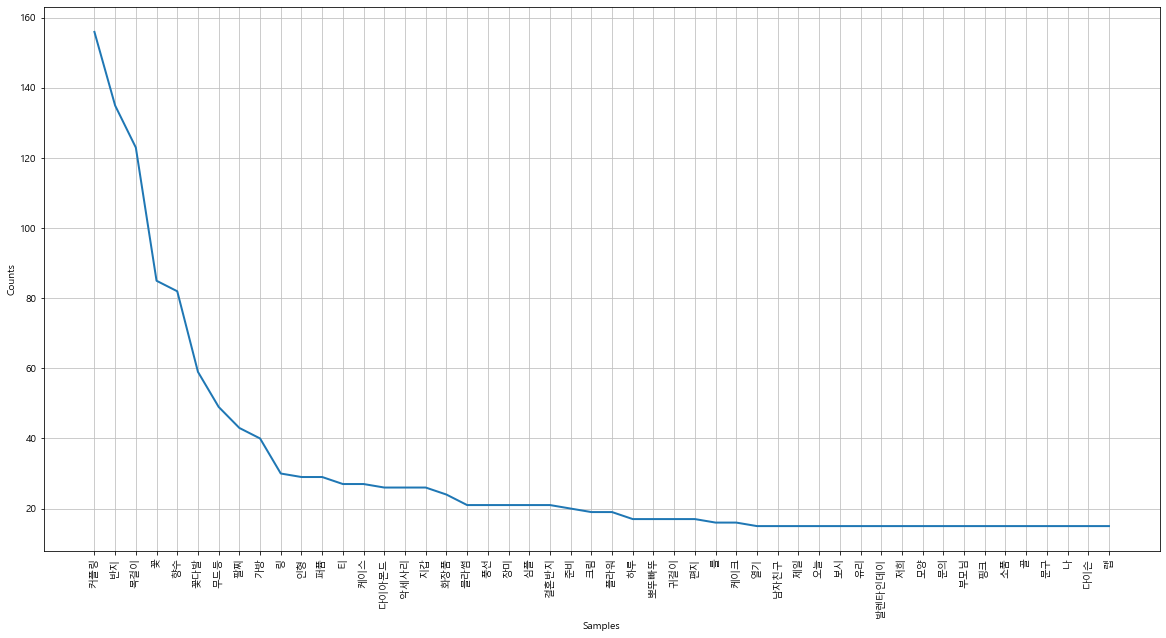

In [45]:
gift = nltk.Text(tokens, name='여친선물')
plt.figure(figsize=(20,10))
gift.plot(50)               # 50개만
plt.show()

In [38]:
stoptext = '''
    선물 추천 후기 수 제품 여자친구 확인 것 가격 저 수수료 스 활동 파트너 여자 이 준 가능 제 브랜드 상품 여친 제공 때 생일 제작
    개 사진 커플 배송 구매 생각 정액 채택 링크 답변 한번 의미 더 여성 참고 분 요 재택 네이버 디자인 가성 거 인기 도움 비 향 등 마감 가지 친구
    고급 하트 용 통해 주문 쿠팡 사용 위 기념일 정말 핸드 변경 남녀 안쪽 종 부담 남자 질문 세트 각인 판매 기부 고민 가요 블로그 아래 곳 정도 사이트 요즘 하나
    중 처리 감동 마음 일환 이니셜 그냥 날 드라마 무광 협찬 후원 가장 포스팅 맞춤 유광 조금 할인 은 직접 보통 사람 시 도 구성 사랑 스토어 너 구경 이면 인테리어
    미만 해 사이즈 자 다이아 로티 다른 비누 전 여기 아주 포장 몇개 복부 듯 옷 평이 옵션 무료 순위 바로가기 로 향기 걸 지금 하투 취향 느낌 아이템 종류 감성 디 퓨저
    하투 때문 이벤트 끈 그 틀 데 쿠폰 인터넷 색상 무난 피부 검색 순 
'''
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]
tokens[:10]

['혹시', '생리통', '열기', '생리통', '이번', '남자친구', '열기', '뭔가', '절', '배']

### 3. 워드 클라우드 그리기

In [47]:
from wordcloud import WordCloud
from PIL import Image 

In [72]:
data = gift.vocab().most_common(300)
font_path = '/usr/share/fonts/truetype/nanum/gulim.ttc'
wc = WordCloud(font_path=font_path, relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))

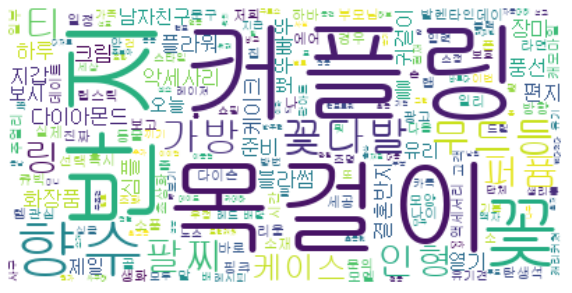

In [55]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림에 표시

In [59]:
# up = files.upload()

NameError: name 'files' is not defined

In [61]:
mask = np.array(Image.open('heart.jpg'))

In [62]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)
wc = WordCloud(font_path=font_path, relative_scaling=0.2, background_color='white', mask=mask, min_font_size=1, max_font_size=120).generate_from_frequencies(dict(data))

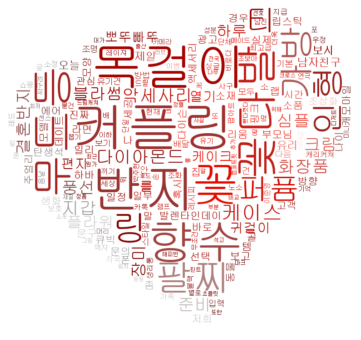

In [63]:
plt.figure(figsize=(10,6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()